# Simple Neural Network
## 2-layer

The simplist neural network looks like this:

<img src="assets/simple.png" width=300px>$$\text{Diagram of a simple neural network. Circles are units, boxes are operations.}$$

These circles are called $\bf{perceptrons}$ or $\bf{neurons}$, and they are the basic unit of a neural network.

The $\bf{weights}$ of the input data are$$w=(w_1,w_2,\cdots,w_N)$$
The $\bf{bias}$ is $b$

The $\bf{activation\ function}$ is $f(h)$. It can be any function. Usuallt use the Heaviside step function or sigmoid function.

We first initial the weights ane the bias, then compute the follows.

In the above diagram, there are 2 layers -- the input layer and the output layer. 

The input of the input layer is $$InputLayer\_input=(x_1,x_2,\cdots,x_N)^T$$

The output of the input layer is $$InputLayer\_output=\sum\limits_{n=1}^{N}x_nw_n+b$$

The input of the output layer is $$OutputLayer\_input=InputLayer\_output$$

The output of the output layer is $$\hat{y}=OutputLayer\_output=f(OutputLayer\_input)$$
## 3-layer
<img src="assets/neural_network.png" width=300px>
The weights of input layer to hidden layer are $$w_1=\left(\begin{matrix}
w_{11}&w_{12}&\cdots&w_{1N_2}&\\
w_{21}&w_{22}&\cdots&w_{2N_2}&\\
\vdots&\vdots&\ddots &\vdots&\\
w_{N_11}&w_{N_12}& \cdots& w_{N_1N_2}&
\end{matrix}\right)$$

$w_{ij}$ means the weight from the $i^{th}$ input perceptron to the the $j^{th}$ hidden perceptron.<img src="assets/3-2.png" width=300px> 
The weights of hidden layer to output layer are $$w_2=(w_{2,1},w_{2,2},\cdots,w_{2,N_2})^T$$

The activative functions of the hidden layer are $\ f_j(h)\qquad (\ j=1,2\cdots,N_2\ )$.

In the above diagram, there are 2 layers -- the input layer and the output layer. 

One input data of the samples set is $$x_1=(x_{21},x_{22},\cdots,x_{2N_1})^T$$

The input of the hidden layer $\ $($\ N_2\times 1$ column verctor )$\ $  is $$HiddenLayer\_input={w'}^Tx_1+b$$

The output of the hidden layer is $$x_{2j}=HiddenLayer\_output(\ j\ )=f_j(OutputLayer\_input) $$

Then $$x_2=(x_{11},x_{12},\cdots,x_{1N_1})^T$$
The input of the output layer is $$OutputLayer\_input=w''^{T}x_2$$

The output of the output layer is $$\hat{y}=OutputLayer\_output=f(OutputLayer\_input)$$


## Error
$\underline{We\ now\ consider\ only\ 2\ layers.}$

The purpose of the network training is to let $\hat{y}$ close to $y$. Therefore, we need a criterion to measure the error. A good chioce is SSE(Sum of the Square Error)
$$\begin{eqnarray}
Error&=&\dfrac{1}{2}\sum\limits_{k=1}^{M}(y^k-\hat{y^k})^2\\
&=&\dfrac{1}{2}\sum\limits_{k=1}^M \left[y_k-f\left(\sum\limits_{j=1}^{N}w_jh_j^k\right)\right]^2\\
\end{eqnarray}$$
We can see the error function is relative to $w_1,w_2,\cdots,w_{N}$. Therefore, we can use the $\bf{Gradient\  Descent\ Method }$ to minimize the error function, which means that we should seek this$$\mathop{\arg\min}_{w_1,w_2,\cdots,w_{N_2}} Error $$
$\underline{We\ first\ consider\ 1\ sample.}$ we seek the gradient$$\begin{eqnarray}
    \dfrac{\partial Error}{\partial w_j}&=&-(y-\hat{y})\dfrac{\partial\hat{y}}{\partial w_j}\\
    &=&-(y-\hat{y})\cdot f_j'(h)\cdot \dfrac{\partial }{\partial w_j}(\sum\limits_{i=1}^{N}w_ix_{i})\\
    &=&-(y-\hat{y})\cdot f_j'(h)\cdot x_{j}&
\end{eqnarray}$$
Then, we define the $\bf{error\ term}$$$\delta=(y-\hat{y})\cdot f'(h)$$

and $$\Delta w_j=LearningRate\cdot \delta\cdot x_{j}$$

Finally, $$w_{j}=w_j+\Delta w_j$$

## Backpropagation
$\underline{For\ more\ than\ 3\ layers. We\ now\ consider\ 3\ layers. }$

We can use the above method to optimal the weights from hidden layer to output layer. But if we want to optimal the weights from input layer to hidden layer, we still need to konw the errors in each perceptrons of the hidden layer.

The total error term is $\delta_0\ (\ 1\ by\ 1 \ )$. $w_2\ (\ N_2\ by\ 1\ ),\ f'(x_2)\ (\ N_2\ by\ 1\ ).$
$$\begin{eqnarray}\delta&=&\delta_0\cdot w_2^T\times f'(x_2)\\
&=&(\delta_1,\delta_2,\cdots,\delta_{N_2})^T
\end{eqnarray}$$
>**Attention:** Here we use  '$\times$'  instead of  '$\cdot$'. It equal to $$\delta=\delta_0\cdot\left(w_{2,1}\cdot f'(x_{21}),w_{2,2}\cdot f'(x_{22}),\cdots,w_{2,N_2}\cdot f'(x_{2N_2})\right)^T$$

$\underline{We\ first\ consider\ 1\ sample.}$ Then we can use $\delta_0$ to compute $\Delta w_2\ (\ N_2\ by\ 1\ )$ and use $\delta$ to compute $\Delta w_1\ (\  N_1\ by\ 1\ )$
$$\Delta w_2=LearningRate\cdot \delta_0\cdot x_{2}$$
$$\Delta w_1=LearningRate\cdot \delta \times x_1$$
Finaly, we get $$w_1=w_1+\Delta w_1$$$$w_2=w_2+\Delta w_2$$

## For more samples
We have 2 strategies.

First, we compute $\Delta w_1^k$ and $\Delta w_2^k$ for each sample$\ (\ k=1,2\cdots,M\ )$. Then compute the means of them and use them as $\Delta w_1$ and $\Delta w_2$.

Second, we once choose a sample randomly and take the $\Delta w_1^k$ and $\Delta w_2^k$ as $\Delta w_1$ and $\Delta w_2$.

The former often use lots of time dealing with the large amount of samples. Therefore, we prefer to choose the latter.

# Programming

## Neural Network Class

In [1]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5, 
                                       (self.input_nodes, self.hidden_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.output_nodes))
        self.lr = learning_rate
        
        #### TODO: Set self.activation_function to your implemented sigmoid function ####
        #
        # Note: in Python, you can define a function with a lambda expression,
        # as shown below.
        self.activation_function = lambda x : 1/(1+np.exp(-x))  # Replace 0 with your sigmoid calculation.
        
        ### If the lambda code above is not something you're familiar with,
        # You can uncomment out the following three lines and put your 
        # implementation there instead.
        #
        #def sigmoid(x):
        #    return 0  # Replace 0 with your sigmoid calculation here
        #self.activation_function = sigmoid
                    
    
    def train(self, features, targets):
        ''' Train the network on batch of features and targets. 
        
            Arguments
            ---------
            
            features: 2D array, each row is one data record, each column is a feature
            targets: 1D array of target values
        
        '''
        n_records = features.shape[0]
        delta_weights_i_h = np.zeros(self.weights_input_to_hidden.shape)
        delta_weights_h_o = np.zeros(self.weights_hidden_to_output.shape)
        for X, y in zip(features, targets):
            #### Implement the forward pass here ####
            ### Forward pass ###
            # TODO: Hidden layer - Replace these values with your calculations.
            hidden_inputs = np.dot(X,self.weights_input_to_hidden) # signals into hidden layer
            hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer

            # TODO: Output layer - Replace these values with your calculations.
            final_inputs = np.dot(hidden_outputs,self.weights_hidden_to_output) # signals into final output layer
            final_outputs = final_inputs # signals from final output layer

            #### Implement the backward pass here ####
            ### Backward pass ###

            # TODO: Output error - Replace this value with your calculations.
            error = y-final_outputs # Output layer error is the difference between desired target and actual output.
            
            # TODO: Calculate the hidden layer's contribution to the error
            hidden_error = np.dot(self.weights_hidden_to_output,error)
       
            # TODO: Backpropagated error terms - Replace these values with your calculations.
            output_error_term = error
            hidden_error_term = hidden_error*hidden_outputs*(1-hidden_outputs)

            # Weight step (input to hidden)
            delta_weights_i_h += hidden_error_term*X[:,None]
            # Weight step (hidden to output)
            delta_weights_h_o += output_error_term*hidden_outputs[:,None]
            


        # TODO: Update the weights - Replace these values with your calculations.
        self.weights_hidden_to_output += self.lr*delta_weights_h_o/n_records # update hidden-to-output weights with gradient descent step
        self.weights_input_to_hidden += self.lr*delta_weights_i_h/n_records # update input-to-hidden weights with gradient descent step

    def run(self, features):
        ''' Run a forward pass through the network with input features 
        
            Arguments
            ---------
            features: 1D array of feature values
        '''
        
        #### Implement the forward pass here ####
        # TODO: Hidden layer - replace these values with the appropriate calculations.
        hidden_inputs = np.dot(features,self.weights_input_to_hidden) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
   
        # TODO: Output layer - Replace these values with the appropriate calculations.
        final_inputs = np.dot(hidden_outputs,self.weights_hidden_to_output) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer 

        return final_outputs

## MSE Function

In [9]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

## Main

In [11]:
import sys
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

test_features=np.load('test_features.npy')
test_targets=np.load('test_targets.npy')
train_features=np.load('train_features.npy')
train_targets=np.load('train_targets.npy')
val_features=np.load('val_features.npy')
val_targets=np.load('val_targets.npy')
scaled_features=np.load('scaled_features.npy')

### Set the hyperparameters here ###
iterations = 1800
learning_rate = 0.12
hidden_nodes = 8
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.shape[0], size=128)
    X, y = train_features[batch,:], train_targets[batch,0]
                             
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features).T, train_targets[:,0])
    val_loss = MSE(network.run(val_features).T, val_targets[:,0])
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 99.9% ... Training loss: 0.268 ... Validation loss: 0.435

## Visualization

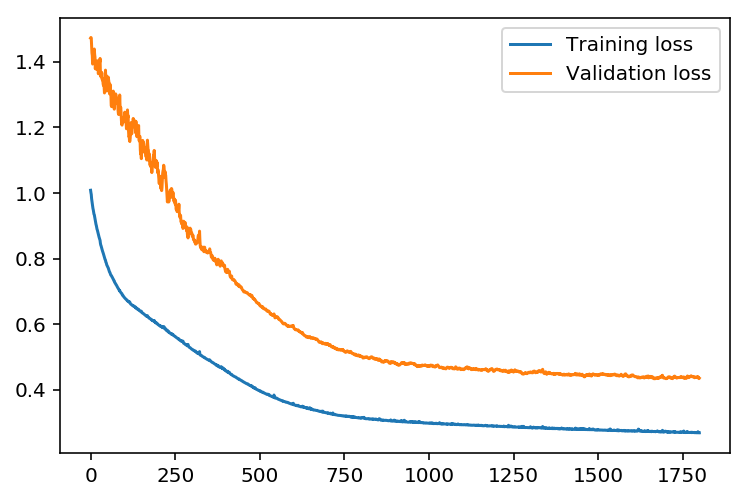

In [12]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

## Predict

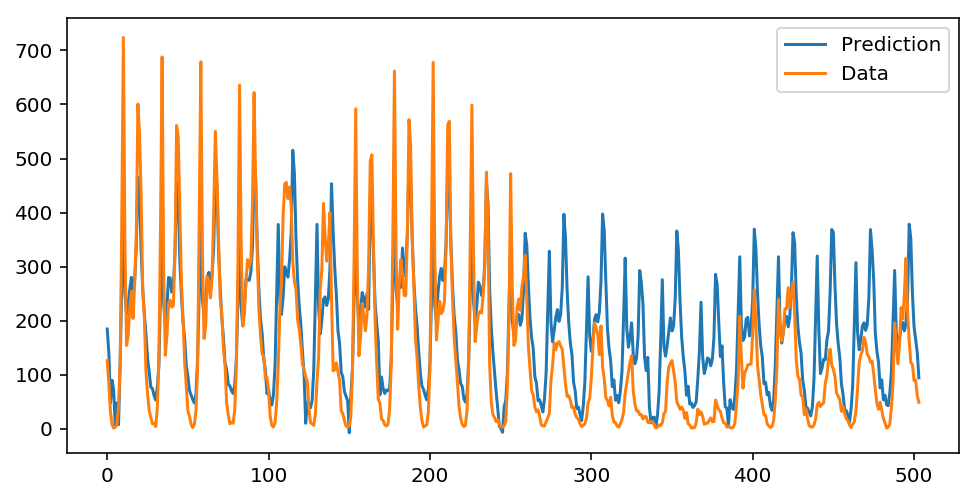

In [35]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features
predictions = network.run(test_features).T*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets[:,0]*std + mean), label='Data')
#ax.set_xlim(right=len(predictions))
ax.legend()